<a href="https://colab.research.google.com/github/Taram1980/finance_ML/blob/master/my_script_sycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import re
import requests
import unicodedata
from bs4 import BeautifulSoup
import requests
# from nrclex import NRCLex
import pandas as pd
import pickle
# import yfinance as yf
import time
import matplotlib.pyplot as plt
# from alpha_vantage.timeseries import TimeSeries
import pickle
import numpy as np
from tqdm import tqdm

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
# plt.plot(stock[stock['Symbol'] == 'PWR']['5. adjusted close'])
# plt.show()

In [ ]:
import bs4 as bs
import requests
import pandas as pd
 

resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})

tickers = []
industries = []
sectors = []

for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        industry = row.findAll('td')[7].text
        sector = row.findAll('td')[3].text

        tickers.append(ticker)
        industries.append(industry)
        sectors.append(sector)

tickers    = list(map(lambda s: s.strip(), tickers))
industries = list(map(lambda s: s.strip(), industries))
sectors     = list(map(lambda s: s.strip(), sectors))

tickerdf = pd.DataFrame(tickers,columns=['ticker'])
sectordf = pd.DataFrame(industries,columns=['SEC'])
sector2df = pd.DataFrame(sectors,columns=['industry'])

tickerandsector = pd.concat([tickerdf, sectordf, sector2df], axis=1)

cik_lookup = dict(tickerandsector[['ticker', 'SEC']].values)

In [ ]:
# new_ = pd.DataFrame()
# for i in stock['Symbol'].unique():
# # for i in ['TSN', 'WAT']:
# #     display(i)
#     s1 = stock[stock['Symbol'] == i]
#     for ii in range(50, 350, 100):
#         s1[str(ii) + '_%'] = (s1['5. adjusted close'].shift(-ii)/s1['5. adjusted close'] - 1)*100 
#     new_ = new_.append(s1)
    

In [ ]:
# %%time
# ts = TimeSeries(key='ELR8VABLOI4PH098', output_format='pandas')
# # stock = pd.DataFrame()
# for ticker in list(cik_lookup.keys())[496:]:    ### ДОКАЧАТЬ
# # for ticker in ['ABMD', 'ACN']:
#     time.sleep(10)
# #     try:
#     display(ticker)
#     s1, meta_data = ts.get_daily_adjusted(symbol=ticker, outputsize='full')
#     s1 = s1[['5. adjusted close']]
#     s1['Symbol'] = ticker
#     s1['Date'] = s1.index
#     s1 = s1.drop_duplicates('Date')
#     s1 = s1.sort_index()
#     for ii in range(50, 350, 100):
#         s1[str(ii) + '_%'] = (s1['5. adjusted close'].shift(-ii)/s1['5. adjusted close'] - 1)*100 

#     stock = stock.append(s1)
# #     except:
# #         continue
# # stock

In [ ]:
# YFINANCE DONT WORK

# %%time

# stock = pd.DataFrame()
# for i in [1,2]:
#     for ticker in cik_lookup[i].keys():
#     # for ticker in pd.DataFrame(cik_lookup.keys())[0][:20]:    
#     # for ticker in ['ADBE']:
#     #     time.sleep(1)
#     #     try:
#         display(ticker)
#         s1 = pd.DataFrame()
#         s1['Close'] = yf.download(ticker, thread = False, start = '2009-01-01', end = '2021-08-01')['Adj Close']
#         s1['Symbol'] = ticker


#         for ii in range(50, 350, 100):
#             s1[str(ii) + '_%'] = (s1['Close'].shift(-ii)/s1['Close'] - 1)*100 
#         stock = stock.append(s1)
#     #     except:
#     #         continue

# Сбор 10-k

### Запись словаря в

In [ ]:

# pickle.dump(document, open("./dic_save/dic.p", "wb"))  # save it into a file named save.p
# document1 = pickle.load(open("./dic_save/dic.p", "rb"))

####  Проверка записи в словарь

In [ ]:
# display(document.keys())
# display(document['AMZN'].keys())
# display(document['AMZN']['2019-02-01'].keys())
# display((document['AMZN']['2019-02-01']['affect_frequencies']))

In [ ]:
# symbol_for = []
# for i in document.keys():
# # for i in ['MMM']:
#     for ii in document[i].keys():
        
# #         display(i, ii)
#         try:
#     #         if 1==1:
#     #             if 2==2:

            
#             if len(document[i][ii]['item_7_raw'])>30000:
#                 if (len(document[i][ii]['item_7_raw'])<300000):
#     #                 display('write')
#                     display(len(document[i][ii]['item_7_raw']))
#                     symbol_for.append(i)
#         except:
# #             display(-len(document[i][ii]['item_7_raw']))
#             continue
            
# # n += 1
# #             display(n)

In [ ]:
%%time

def restore_windows_1252_characters(restore_string):
    """
        Replace C1 control characters in the Unicode string s by the
        characters at the corresponding code points in Windows-1252,
        where possible.
    """

    def to_windows_1252(match):
        try:
            return bytes([ord(match.group(0))]).decode('windows-1252')
        except UnicodeDecodeError:
            # No character at the corresponding code point: remove it.
            return ''
        
    return re.sub(r'[\u0080-\u0099]', to_windows_1252, restore_string)


CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 8.58 µs


In [ ]:
# for CIK in tqdm(cik_lookup.values()):
#   display(CIK)
# requests.get(url = endpoint, params = param_dict)
# BeautifulSoup(response.content, 'html.parser')

In [ ]:
response
response1

<Response [429]>

In [ ]:
%%time

#создать 1 раз и не перезаписывать
htm_list = {} 
text_object_dic = {} # поднять навез чтобы не перезаписывать


# base URL for the SEC EDGAR browser
endpoint = r"https://www.sec.gov/cgi-bin/browse-edgar"
CIK = '0001018724'
# define our parameters dictionary
for CIK in tqdm(cik_lookup.values()):
    display(CIK)
    param_dict = {'action':'getcompany',
                  'CIK':CIK,
                  'type':'10-k',
                  'dateb':'20210101',
                  'owner':'exclude',
                  'start':'',
                  'output':'',
                  'count':'10'}
    # request the url, and then parse the response.
    response = requests.get(url = endpoint, params = param_dict)
    display('here')
    if response.status_code == 429:
      time.sleep(int(response.headers["Retry-After"]))
    else:
      soup = BeautifulSoup(response.content, 'html.parser')
      
      # Let the user know it was successful.
      print('Request Successful')
      print(response.url)

      doc_table = soup.find_all('table', class_='tableFile2')

      # define a base url that will be used for link building.
      base_url_sec = r"https://www.sec.gov"

      master_list = []
      filing_doc_links = []
      
      # loop through each row in the table.
      for row in doc_table[0].find_all('tr')[1:]:
          # display('here')
          # find all the columns
          cols = row.find_all('td')

          # if there are no columns move on to the next row.
          if len(cols) != 0:        

              # grab the text
              filing_type = cols[0].text.strip()                 
              filing_date = cols[3].text.strip()
              filing_numb = cols[4].text.strip()

              # find the links
              filing_doc_href = cols[1].find('a', {'href':True, 'id':'documentsbutton'})       
              filing_int_href = cols[1].find('a', {'href':True, 'id':'interactiveDataBtn'})
              filing_num_href = cols[4].find('a')

              # grab the the first href
              if filing_doc_href != None:
                  filing_doc_link = base_url_sec + filing_doc_href['href'] 
              else:
                  filing_doc_link = 'no link'

              # grab the second href
              if filing_int_href != None:
                  filing_int_link = base_url_sec + filing_int_href['href'] 
              else:
                  filing_int_link = 'no link'

              # grab the third href
              if filing_num_href != None:
                  filing_num_link = base_url_sec + filing_num_href['href'] 
              else:
                  filing_num_link = 'no link'

              # create and store data in the dictionary
              file_dict = {}
              file_dict['file_type'] = filing_type
              file_dict['file_number'] = filing_numb
              file_dict['file_date'] = filing_date
              file_dict['links'] = {}
              file_dict['links']['documents'] = filing_doc_link
              file_dict['links']['interactive_data'] = filing_int_link
              file_dict['links']['filing_number'] = filing_num_link

              # let the user know it's working
      #         print('-'*100)        
      #         print("Filing Type: " + filing_type)
      #         print("Filing Date: " + filing_date)
      #         print("Filing Number: " + filing_numb)
      #         print("Document Link: " + filing_doc_link)
      #         print("Filing Number Link: " + filing_num_link)
      #         print("Interactive Data Link: " + filing_int_link)

              # append dictionary to master list
              master_list.append(file_dict)
              filing_doc_links.append(filing_doc_link)


      finals_list = []
      data = []

      # МОЯ ДОБАВКА. ВТОРОЙ ТАБЛИЦА ВСЕ ВЗЯТЬ И ПОУЛЧИТЬ ДОКУМЕНТЫ
      for i in range(len(master_list)):
          response1 = requests.get(url = master_list[i]['links']['documents'])
          if response1.status_code == 429:
            time.sleep(int(response.headers["Retry-After"]))
          else:
          # https://www.sec.gov/Archives/edgar/data/1265107/000126510719000004/0001265107-19-000004-index.htm
            soup1 = BeautifulSoup(response1.content, 'html.parser')
            doc_table1 = soup1.find_all('table', class_='tableFile')

        #     filing_doc_href1 = doc_table1[0].find_all('a', {'href':True})[-1] #for txt
            filing_doc_href1 = doc_table1[0].find_all('a', {'href':True})[0] #for hml
            finals_list.append(base_url_sec + filing_doc_href1['href'])
            data.append(master_list[i]['file_date'])
      finals_list

      # СОЗДАЛИ СЛОВАРЬ С УКАЗАНИЕМ НА КОМПАНИЮ
      htm_list[CIK] = [finals_list,data]
  #     htm_list[CIK]








  0%|          | 0/505 [00:00<?, ?it/s]

'0000066740'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000066740&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  0%|          | 1/505 [00:00<04:40,  1.80it/s]

'0000001800'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000001800&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  0%|          | 2/505 [00:01<05:49,  1.44it/s]

'0001551152'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001551152&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  1%|          | 3/505 [00:02<06:07,  1.37it/s]

'0000815094'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000815094&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  1%|          | 4/505 [00:03<06:47,  1.23it/s]

'0001467373'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001467373&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  1%|          | 5/505 [00:04<07:38,  1.09it/s]

'0000718877'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000718877&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  1%|          | 6/505 [00:05<06:56,  1.20it/s]

'0000796343'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000796343&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  1%|▏         | 7/505 [00:06<07:24,  1.12it/s]

'0000002488'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000002488&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  2%|▏         | 8/505 [00:07<07:38,  1.08it/s]

'0001158449'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001158449&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  2%|▏         | 9/505 [00:08<08:00,  1.03it/s]

'0000874761'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000874761&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  2%|▏         | 10/505 [00:09<09:17,  1.13s/it]

'0000004977'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000004977&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  2%|▏         | 11/505 [00:10<09:01,  1.10s/it]

'0001090872'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001090872&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  2%|▏         | 12/505 [00:11<08:47,  1.07s/it]

'0000002969'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000002969&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  3%|▎         | 13/505 [00:12<08:48,  1.07s/it]

'0001086222'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001086222&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  3%|▎         | 14/505 [00:13<08:46,  1.07s/it]

'0000766421'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000766421&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  3%|▎         | 15/505 [00:15<09:18,  1.14s/it]

'0000915913'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000915913&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  3%|▎         | 16/505 [00:16<09:00,  1.11s/it]

'0001035443'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001035443&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  3%|▎         | 17/505 [00:17<08:42,  1.07s/it]

'0000899866'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000899866&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  4%|▎         | 18/505 [00:18<08:45,  1.08s/it]

'0001097149'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001097149&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  4%|▍         | 19/505 [00:19<08:55,  1.10s/it]

'0001579241'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001579241&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  4%|▍         | 20/505 [00:20<08:03,  1.00it/s]

'0000352541'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000352541&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  4%|▍         | 21/505 [00:21<08:30,  1.05s/it]

'0000899051'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000899051&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  4%|▍         | 22/505 [00:22<08:19,  1.03s/it]

'0001652044'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001652044&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  5%|▍         | 23/505 [00:23<07:44,  1.04it/s]

'0001652044'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001652044&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  5%|▍         | 24/505 [00:23<06:06,  1.31it/s]

'0000764180'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000764180&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  5%|▍         | 25/505 [00:24<07:04,  1.13it/s]

'0001018724'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001018724&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  5%|▌         | 26/505 [00:25<07:24,  1.08it/s]

'0001748790'

'here'







  5%|▌         | 27/505 [00:26<05:51,  1.36it/s]

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001748790&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10


'0001002910'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001002910&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  6%|▌         | 28/505 [00:27<07:03,  1.13it/s]

'0000006201'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000006201&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  6%|▌         | 29/505 [00:28<07:30,  1.06it/s]

'0000004904'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000004904&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  6%|▌         | 30/505 [00:29<07:15,  1.09it/s]

'0000004962'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000004962&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  6%|▌         | 31/505 [00:30<07:47,  1.01it/s]

'0000005272'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000005272&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  6%|▋         | 32/505 [00:31<08:29,  1.08s/it]

'0001053507'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001053507&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  7%|▋         | 33/505 [00:32<07:54,  1.00s/it]

'0001410636'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001410636&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  7%|▋         | 34/505 [00:33<07:41,  1.02it/s]

'0000820027'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000820027&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  7%|▋         | 35/505 [00:34<08:04,  1.03s/it]

'0001140859'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001140859&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  7%|▋         | 36/505 [00:35<07:56,  1.02s/it]

'0001037868'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001037868&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  7%|▋         | 37/505 [00:36<08:17,  1.06s/it]

'0000318154'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000318154&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  8%|▊         | 38/505 [00:37<08:22,  1.08s/it]

'0000820313'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000820313&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  8%|▊         | 39/505 [00:38<08:14,  1.06s/it]

'0000006281'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000006281&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  8%|▊         | 40/505 [00:40<08:34,  1.11s/it]

'0001013462'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001013462&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  8%|▊         | 41/505 [00:40<07:54,  1.02s/it]

'0001156039'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001156039&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  8%|▊         | 42/505 [00:41<07:51,  1.02s/it]

'0000315293'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000315293&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  9%|▊         | 43/505 [00:43<08:06,  1.05s/it]

'0000091142'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000091142&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  9%|▊         | 44/505 [00:44<07:58,  1.04s/it]

'0000006769'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000006769&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  9%|▉         | 45/505 [00:44<07:18,  1.05it/s]

'0000320193'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000320193&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  9%|▉         | 46/505 [00:45<07:14,  1.06it/s]

'0000006951'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000006951&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








  9%|▉         | 47/505 [00:46<07:15,  1.05it/s]

'0001521332'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001521332&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 10%|▉         | 48/505 [00:47<06:22,  1.19it/s]

'0000007084'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000007084&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 10%|▉         | 49/505 [00:48<06:49,  1.11it/s]

'0001596532'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001596532&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 10%|▉         | 50/505 [00:49<06:48,  1.11it/s]

'0000354190'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000354190&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 10%|█         | 51/505 [00:50<07:17,  1.04it/s]

'0001267238'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001267238&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 10%|█         | 52/505 [00:51<07:44,  1.03s/it]

'0000732717'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000732717&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 10%|█         | 53/505 [00:52<08:00,  1.06s/it]

'0000731802'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000731802&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 11%|█         | 54/505 [00:53<07:50,  1.04s/it]

'0000769397'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000769397&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 11%|█         | 55/505 [00:54<07:46,  1.04s/it]

'0000008670'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000008670&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 11%|█         | 56/505 [00:55<07:46,  1.04s/it]

'0000866787'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000866787&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 11%|█▏        | 57/505 [00:56<08:14,  1.10s/it]

'0000915912'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000915912&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 11%|█▏        | 58/505 [00:57<07:56,  1.06s/it]

'0000008818'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000008818&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 12%|█▏        | 59/505 [00:59<07:59,  1.08s/it]

'0001701605'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001701605&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 12%|█▏        | 60/505 [00:59<06:34,  1.13it/s]

'0000009389'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000009389&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 12%|█▏        | 61/505 [01:00<07:51,  1.06s/it]

'0000070858'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000070858&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 12%|█▏        | 62/505 [01:01<07:27,  1.01s/it]

'0001390777'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001390777&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 12%|█▏        | 63/505 [01:03<08:10,  1.11s/it]

'0000010456'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000010456&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 13%|█▎        | 64/505 [01:04<08:25,  1.15s/it]

'0000010795'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000010795&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 13%|█▎        | 65/505 [01:05<08:53,  1.21s/it]

'0001067983'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001067983&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 13%|█▎        | 66/505 [01:07<09:08,  1.25s/it]

'0000764478'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000764478&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 13%|█▎        | 67/505 [01:08<09:27,  1.30s/it]

'0000012208'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000012208&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 13%|█▎        | 68/505 [01:09<09:36,  1.32s/it]

'0000875045'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000875045&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 14%|█▎        | 69/505 [01:11<09:45,  1.34s/it]

'0001364742'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001364742&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 14%|█▍        | 70/505 [01:12<10:17,  1.42s/it]

'0000012927'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000012927&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 14%|█▍        | 71/505 [01:14<09:59,  1.38s/it]

'0001075531'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001075531&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 14%|█▍        | 72/505 [01:15<09:19,  1.29s/it]

'0000908255'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000908255&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 14%|█▍        | 73/505 [01:16<08:58,  1.25s/it]

'0001037540'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001037540&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 15%|█▍        | 74/505 [01:17<08:42,  1.21s/it]

'0000885725'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000885725&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 15%|█▍        | 75/505 [01:18<08:11,  1.14s/it]

'0000014272'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000014272&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 15%|█▌        | 76/505 [01:19<08:06,  1.13s/it]

'0001730168'

'here'







 15%|█▌        | 77/505 [01:19<06:17,  1.14it/s]

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001730168&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10


'0001383312'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001383312&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 15%|█▌        | 78/505 [01:21<06:47,  1.05it/s]

'0000014693'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000014693&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 16%|█▌        | 79/505 [01:22<07:43,  1.09s/it]

'0001043277'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001043277&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 16%|█▌        | 80/505 [01:23<07:43,  1.09s/it]

'0000858470'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000858470&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 16%|█▌        | 81/505 [01:24<07:35,  1.07s/it]

'0000813672'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000813672&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 16%|█▌        | 82/505 [01:25<07:49,  1.11s/it]

'0000016732'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000016732&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 16%|█▋        | 83/505 [01:26<07:44,  1.10s/it]

'0000927628'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000927628&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 17%|█▋        | 84/505 [01:28<08:01,  1.14s/it]

'0000721371'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000721371&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 17%|█▋        | 85/505 [01:29<07:58,  1.14s/it]

'0001170010'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001170010&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 17%|█▋        | 86/505 [01:29<07:08,  1.02s/it]

'0000815097'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000815097&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 17%|█▋        | 87/505 [01:31<08:15,  1.19s/it]

'0001783180'

'here'







 17%|█▋        | 88/505 [01:31<06:00,  1.16it/s]

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001783180&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10


'0001596783'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001596783&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 18%|█▊        | 89/505 [01:32<06:20,  1.09it/s]

'0000018230'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000018230&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 18%|█▊        | 90/505 [01:33<06:38,  1.04it/s]

'0001374310'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001374310&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 18%|█▊        | 91/505 [01:35<07:18,  1.06s/it]

'0001138118'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001138118&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 18%|█▊        | 92/505 [01:35<06:31,  1.06it/s]

'0001402057'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001402057&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 18%|█▊        | 93/505 [01:36<06:58,  1.02s/it]

'0001306830'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001306830&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 19%|█▊        | 94/505 [01:38<07:34,  1.11s/it]

'0001071739'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001071739&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 19%|█▉        | 95/505 [01:39<07:09,  1.05s/it]

'0001130310'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001130310&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 19%|█▉        | 96/505 [01:40<07:11,  1.06s/it]

'0000804753'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000804753&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 19%|█▉        | 97/505 [01:41<06:50,  1.01s/it]

'0001324404'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001324404&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 19%|█▉        | 98/505 [01:42<07:13,  1.07s/it]

'0000316709'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000316709&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 20%|█▉        | 99/505 [01:43<07:17,  1.08s/it]

'0001091667'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001091667&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 20%|█▉        | 100/505 [01:44<07:50,  1.16s/it]

'0000093410'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000093410&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 20%|██        | 101/505 [01:46<08:59,  1.34s/it]

'0001058090'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001058090&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 20%|██        | 102/505 [01:47<08:11,  1.22s/it]

'0000896159'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000896159&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 20%|██        | 103/505 [01:48<08:12,  1.23s/it]

'0000313927'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000313927&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 21%|██        | 104/505 [01:50<08:27,  1.27s/it]

'0001739940'

'here'







 21%|██        | 105/505 [01:50<06:54,  1.04s/it]

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001739940&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10


'0000020286'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000020286&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 21%|██        | 106/505 [01:51<06:50,  1.03s/it]

'0000723254'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000723254&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 21%|██        | 107/505 [01:52<06:48,  1.03s/it]

'0000858877'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000858877&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 21%|██▏       | 108/505 [01:53<05:35,  1.18it/s]

'0000831001'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000831001&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 22%|██▏       | 109/505 [01:54<06:18,  1.05it/s]

'0000759944'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000759944&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 22%|██▏       | 110/505 [01:54<05:47,  1.14it/s]

'0000877890'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000877890&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 22%|██▏       | 111/505 [01:56<06:19,  1.04it/s]

'0000021076'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000021076&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 22%|██▏       | 112/505 [01:57<06:31,  1.00it/s]

'0001156375'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001156375&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 22%|██▏       | 113/505 [01:58<07:05,  1.08s/it]

'0000811156'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000811156&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 23%|██▎       | 114/505 [01:59<07:46,  1.19s/it]

'0000021344'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000021344&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 23%|██▎       | 115/505 [02:01<07:41,  1.18s/it]

'0001058290'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001058290&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 23%|██▎       | 116/505 [02:01<06:22,  1.02it/s]

'0000021665'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000021665&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 23%|██▎       | 117/505 [02:02<06:37,  1.02s/it]

'0001166691'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001166691&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 23%|██▎       | 118/505 [02:03<06:54,  1.07s/it]

'0000028412'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000028412&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 24%|██▎       | 119/505 [02:05<07:02,  1.10s/it]

'0000023217'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000023217&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 24%|██▍       | 120/505 [02:06<06:58,  1.09s/it]

'0001163165'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001163165&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 24%|██▍       | 121/505 [02:07<06:44,  1.05s/it]

'0001047862'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001047862&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 24%|██▍       | 122/505 [02:08<07:10,  1.12s/it]

'0000016918'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000016918&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 24%|██▍       | 123/505 [02:09<06:41,  1.05s/it]

'0000711404'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000711404&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 25%|██▍       | 124/505 [02:10<06:55,  1.09s/it]

'0000900075'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000900075&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 25%|██▍       | 125/505 [02:11<07:09,  1.13s/it]

'0000024741'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000024741&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 25%|██▍       | 126/505 [02:12<07:30,  1.19s/it]

'0001755672'

'here'







 25%|██▌       | 127/505 [02:13<05:41,  1.11it/s]

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001755672&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10


'0000909832'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000909832&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 25%|██▌       | 128/505 [02:14<05:54,  1.06it/s]

'0001051470'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001051470&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 26%|██▌       | 129/505 [02:15<05:52,  1.07it/s]

'0000277948'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000277948&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 26%|██▌       | 130/505 [02:16<06:13,  1.01it/s]

'0000026172'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000026172&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 26%|██▌       | 131/505 [02:17<06:07,  1.02it/s]

'0000064803'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000064803&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 26%|██▌       | 132/505 [02:18<06:43,  1.08s/it]

'0000882184'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000882184&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 26%|██▋       | 133/505 [02:19<06:32,  1.06s/it]

'0000313616'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000313616&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 27%|██▋       | 134/505 [02:20<06:38,  1.07s/it]

'0000940944'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000940944&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 27%|██▋       | 135/505 [02:21<06:16,  1.02s/it]

'0000927066'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000927066&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 27%|██▋       | 136/505 [02:22<06:35,  1.07s/it]

'0000315189'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000315189&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 27%|██▋       | 137/505 [02:23<06:35,  1.07s/it]

'0000027904'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000027904&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 27%|██▋       | 138/505 [02:24<06:28,  1.06s/it]

'0000818479'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000818479&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 28%|██▊       | 139/505 [02:25<05:37,  1.08it/s]

'0001090012'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001090012&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 28%|██▊       | 140/505 [02:26<06:01,  1.01it/s]

'0001093557'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001093557&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 28%|██▊       | 141/505 [02:27<06:17,  1.04s/it]

'0001539838'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001539838&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 28%|██▊       | 142/505 [02:28<05:42,  1.06it/s]

'0001297996'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001297996&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 28%|██▊       | 143/505 [02:29<05:38,  1.07it/s]

'0001393612'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001393612&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 29%|██▊       | 144/505 [02:30<05:15,  1.14it/s]

'0001437107'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001437107&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 29%|██▊       | 145/505 [02:31<05:35,  1.07it/s]

'0001437107'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001437107&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 29%|██▉       | 146/505 [02:31<04:40,  1.28it/s]

'0001001082'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001001082&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 29%|██▉       | 147/505 [02:32<04:54,  1.22it/s]

'0000029534'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000029534&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 29%|██▉       | 148/505 [02:33<05:00,  1.19it/s]

'0000935703'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000935703&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 30%|██▉       | 149/505 [02:34<05:17,  1.12it/s]

'0000715957'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000715957&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 30%|██▉       | 150/505 [02:35<05:49,  1.02it/s]

'0001286681'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001286681&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 30%|██▉       | 151/505 [02:36<05:50,  1.01it/s]

'0000029905'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000029905&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 30%|███       | 152/505 [02:37<05:54,  1.00s/it]

'0001751788'

'here'







 30%|███       | 153/505 [02:37<04:29,  1.31it/s]

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001751788&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10


'0000936340'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000936340&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 30%|███       | 154/505 [02:38<04:55,  1.19it/s]

'0001326160'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001326160&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 31%|███       | 155/505 [02:40<06:19,  1.08s/it]

'0000783280'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000783280&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 31%|███       | 156/505 [02:41<06:45,  1.16s/it]

'0001666700'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001666700&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 31%|███       | 157/505 [02:42<05:25,  1.07it/s]

'0001688568'

'here'







 31%|███▏      | 158/505 [02:42<04:17,  1.35it/s]

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001688568&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10


'0000915389'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000915389&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 31%|███▏      | 159/505 [02:43<04:46,  1.21it/s]

'0001551182'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001551182&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 32%|███▏      | 160/505 [02:44<04:51,  1.18it/s]

'0001065088'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001065088&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 32%|███▏      | 161/505 [02:45<05:34,  1.03it/s]

'0000031462'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000031462&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 32%|███▏      | 162/505 [02:46<05:44,  1.00s/it]

'0000827052'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000827052&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 32%|███▏      | 163/505 [02:48<06:09,  1.08s/it]

'0001099800'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001099800&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 32%|███▏      | 164/505 [02:49<06:37,  1.17s/it]

'0000712515'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000712515&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 33%|███▎      | 165/505 [02:50<06:47,  1.20s/it]

'0000032604'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000032604&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 33%|███▎      | 166/505 [02:52<07:11,  1.27s/it]

'0001463101'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001463101&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 33%|███▎      | 167/505 [02:53<06:30,  1.15s/it]

'0000065984'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000065984&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 33%|███▎      | 168/505 [02:54<07:19,  1.30s/it]

'0000821189'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000821189&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 33%|███▎      | 169/505 [02:55<06:49,  1.22s/it]

'0000033185'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000033185&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 34%|███▎      | 170/505 [02:57<07:08,  1.28s/it]

'0001101239'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001101239&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 34%|███▍      | 171/505 [02:58<07:05,  1.27s/it]

'0000906107'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000906107&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 34%|███▍      | 172/505 [02:59<07:11,  1.30s/it]

'0000920522'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000920522&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 34%|███▍      | 173/505 [03:01<07:12,  1.30s/it]

'0001001250'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001001250&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 34%|███▍      | 174/505 [03:02<06:57,  1.26s/it]

'0001370637'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001370637&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 35%|███▍      | 175/505 [03:02<05:45,  1.05s/it]

'0001711269'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001711269&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 35%|███▍      | 176/505 [03:03<05:04,  1.08it/s]

'0000072741'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000072741&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 35%|███▌      | 177/505 [03:04<05:48,  1.06s/it]

'0001095073'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001095073&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 35%|███▌      | 178/505 [03:05<05:14,  1.04it/s]

'0001109357'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001109357&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 35%|███▌      | 179/505 [03:08<07:45,  1.43s/it]

'0001324424'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001324424&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 36%|███▌      | 180/505 [03:08<06:34,  1.21s/it]

'0000746515'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000746515&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 36%|███▌      | 181/505 [03:10<06:39,  1.23s/it]

'0001289490'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001289490&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 36%|███▌      | 182/505 [03:11<07:14,  1.34s/it]

'0000034088'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000034088&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 36%|███▌      | 183/505 [03:12<06:39,  1.24s/it]

'0001048695'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001048695&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 36%|███▋      | 184/505 [03:13<06:23,  1.20s/it]

'0001326801'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001326801&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 37%|███▋      | 185/505 [03:14<05:45,  1.08s/it]

'0000815556'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000815556&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 37%|███▋      | 186/505 [03:15<06:03,  1.14s/it]

'0000034903'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000034903&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 37%|███▋      | 187/505 [03:16<05:57,  1.12s/it]

'0001048911'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001048911&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 37%|███▋      | 188/505 [03:18<05:56,  1.12s/it]

'0001136893'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001136893&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 37%|███▋      | 189/505 [03:19<06:15,  1.19s/it]

'0000035527'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000035527&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 38%|███▊      | 190/505 [03:20<06:51,  1.31s/it]

'0001031296'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001031296&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 38%|███▊      | 191/505 [03:22<06:39,  1.27s/it]

'0001132979'

'here'







 38%|███▊      | 192/505 [03:22<04:48,  1.09it/s]

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001132979&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10


'0000798354'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000798354&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 38%|███▊      | 193/505 [03:23<05:01,  1.04it/s]

'0001175454'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001175454&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 38%|███▊      | 194/505 [03:24<05:27,  1.05s/it]

'0000354908'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000354908&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 39%|███▊      | 195/505 [03:25<05:18,  1.03s/it]

'0000030625'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000030625&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 39%|███▉      | 196/505 [03:26<05:10,  1.01s/it]

'0000037785'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000037785&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 39%|███▉      | 197/505 [03:27<05:12,  1.01s/it]

'0000037996'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000037996&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 39%|███▉      | 198/505 [03:28<05:24,  1.06s/it]

'0001262039'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001262039&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 39%|███▉      | 199/505 [03:29<05:43,  1.12s/it]

'0001659166'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001659166&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 40%|███▉      | 200/505 [03:30<05:03,  1.01it/s]

'0001519751'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001519751&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 40%|███▉      | 201/505 [03:31<04:52,  1.04it/s]

'0001754301'

'here'







 40%|████      | 202/505 [03:31<03:46,  1.34it/s]

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001754301&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10


'0001754301'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001754301&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 40%|████      | 203/505 [03:31<02:49,  1.79it/s]

'0000038777'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000038777&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 40%|████      | 204/505 [03:32<03:33,  1.41it/s]

'0000831259'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000831259&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 41%|████      | 205/505 [03:34<04:13,  1.18it/s]

'0000039911'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000039911&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 41%|████      | 206/505 [03:35<04:18,  1.16it/s]

'0001121788'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001121788&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 41%|████      | 207/505 [03:35<04:23,  1.13it/s]

'0000749251'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000749251&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 41%|████      | 208/505 [03:37<05:30,  1.11s/it]

'0000040533'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000040533&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 41%|████▏     | 209/505 [03:38<05:26,  1.10s/it]

'0000040545'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000040545&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 42%|████▏     | 210/505 [03:40<05:50,  1.19s/it]

'0000040704'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000040704&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 42%|████▏     | 211/505 [03:40<05:13,  1.07s/it]

'0001467858'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001467858&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 42%|████▏     | 212/505 [03:41<04:52,  1.00it/s]

'0000040987'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000040987&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 42%|████▏     | 213/505 [03:42<04:33,  1.07it/s]

'0000882095'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000882095&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 42%|████▏     | 214/505 [03:43<04:19,  1.12it/s]

'0000320335'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000320335&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 43%|████▎     | 215/505 [03:44<05:04,  1.05s/it]

'0001123360'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001123360&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 43%|████▎     | 216/505 [03:45<05:01,  1.04s/it]

'0000886982'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000886982&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 43%|████▎     | 217/505 [03:46<04:30,  1.06it/s]

'0000277135'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000277135&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 43%|████▎     | 218/505 [03:47<04:33,  1.05it/s]

'0000045012'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000045012&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 43%|████▎     | 219/505 [03:48<04:42,  1.01it/s]

'0001359841'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001359841&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 44%|████▎     | 220/505 [03:49<04:47,  1.01s/it]

'0000874766'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000874766&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 44%|████▍     | 221/505 [03:50<04:44,  1.00s/it]

'0000046080'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000046080&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 44%|████▍     | 222/505 [03:51<04:28,  1.06it/s]

'0000860730'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000860730&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 44%|████▍     | 223/505 [03:52<04:31,  1.04it/s]

'0000765880'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000765880&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 44%|████▍     | 224/505 [03:53<04:55,  1.05s/it]

'0001000228'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001000228&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 45%|████▍     | 225/505 [03:54<04:47,  1.03s/it]

'0000047111'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000047111&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 45%|████▍     | 226/505 [03:55<05:01,  1.08s/it]

'0000004447'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000004447&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 45%|████▍     | 227/505 [03:56<04:33,  1.02it/s]

'0001645590'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001645590&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 45%|████▌     | 228/505 [03:57<03:50,  1.20it/s]

'0001585689'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001585689&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 45%|████▌     | 229/505 [03:58<04:19,  1.07it/s]

'0000048039'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000048039&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 46%|████▌     | 230/505 [03:59<04:41,  1.02s/it]

'0000859737'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000859737&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 46%|████▌     | 231/505 [04:00<04:27,  1.02it/s]

'0000354950'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000354950&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 46%|████▌     | 232/505 [04:01<04:18,  1.06it/s]

'0000773840'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000773840&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 46%|████▌     | 233/505 [04:02<04:05,  1.11it/s]

'0000048465'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000048465&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 46%|████▋     | 234/505 [04:02<03:56,  1.14it/s]

'0001070750'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001070750&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 47%|████▋     | 235/505 [04:04<04:26,  1.01it/s]

'0000004281'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000004281&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 47%|████▋     | 236/505 [04:05<04:42,  1.05s/it]

'0000047217'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000047217&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 47%|████▋     | 237/505 [04:06<04:33,  1.02s/it]

'0000049071'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000049071&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 47%|████▋     | 238/505 [04:07<04:34,  1.03s/it]

'0000049196'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000049196&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 47%|████▋     | 239/505 [04:08<04:33,  1.03s/it]

'0001501585'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001501585&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 48%|████▊     | 240/505 [04:09<04:17,  1.03it/s]

'0000832101'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000832101&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 48%|████▊     | 241/505 [04:10<04:16,  1.03it/s]

'0000874716'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000874716&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 48%|████▊     | 242/505 [04:11<05:05,  1.16s/it]

'0001598014'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001598014&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 48%|████▊     | 243/505 [04:12<04:44,  1.08s/it]

'0000049826'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000049826&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 48%|████▊     | 244/505 [04:13<05:04,  1.17s/it]

'0001110803'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001110803&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 49%|████▊     | 245/505 [04:15<05:12,  1.20s/it]

'0000879169'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000879169&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 49%|████▊     | 246/505 [04:16<04:44,  1.10s/it]

'0001699150'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001699150&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 49%|████▉     | 247/505 [04:16<03:48,  1.13it/s]

'0000050863'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000050863&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 49%|████▉     | 248/505 [04:17<03:55,  1.09it/s]

'0001571949'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001571949&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 49%|████▉     | 249/505 [04:18<03:38,  1.17it/s]

'0000051143'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000051143&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 50%|████▉     | 250/505 [04:19<03:40,  1.16it/s]

'0000051434'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000051434&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 50%|████▉     | 251/505 [04:20<03:59,  1.06it/s]

'0000051644'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000051644&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 50%|████▉     | 252/505 [04:21<04:07,  1.02it/s]

'0000051253'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000051253&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 50%|█████     | 253/505 [04:22<04:06,  1.02it/s]

'0000896878'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000896878&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 50%|█████     | 254/505 [04:23<04:09,  1.01it/s]

'0001035267'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001035267&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 50%|█████     | 255/505 [04:24<04:25,  1.06s/it]

'0000914208'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000914208&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 51%|█████     | 256/505 [04:25<04:13,  1.02s/it]

'0001111928'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001111928&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 51%|█████     | 257/505 [04:26<03:57,  1.04it/s]

'0001478242'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001478242&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 51%|█████     | 258/505 [04:27<03:57,  1.04it/s]

'0001020569'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001020569&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 51%|█████▏    | 259/505 [04:28<03:46,  1.09it/s]

'0000779152'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000779152&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 51%|█████▏    | 260/505 [04:29<03:51,  1.06it/s]

'0000052988'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000052988&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 52%|█████▏    | 261/505 [04:29<03:40,  1.10it/s]

'0000728535'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000728535&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 52%|█████▏    | 262/505 [04:31<04:00,  1.01it/s]

'0000091419'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000091419&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 52%|█████▏    | 263/505 [04:32<03:59,  1.01it/s]

'0000200406'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000200406&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 52%|█████▏    | 264/505 [04:32<03:41,  1.09it/s]

'0000833444'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000833444&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 52%|█████▏    | 265/505 [04:33<03:18,  1.21it/s]

'0000019617'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000019617&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 53%|█████▎    | 266/505 [04:34<03:08,  1.27it/s]

'0001043604'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001043604&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 53%|█████▎    | 267/505 [04:34<02:54,  1.36it/s]

'0000054480'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000054480&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 53%|█████▎    | 268/505 [04:35<03:06,  1.27it/s]

'0000055067'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000055067&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 53%|█████▎    | 269/505 [04:36<02:54,  1.35it/s]

'0000091576'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000091576&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 53%|█████▎    | 270/505 [04:36<02:40,  1.46it/s]

'0001601046'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001601046&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 54%|█████▎    | 271/505 [04:37<02:22,  1.64it/s]

'0000055785'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000055785&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 54%|█████▍    | 272/505 [04:37<02:18,  1.69it/s]

'0000879101'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000879101&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 54%|█████▍    | 273/505 [04:38<02:34,  1.50it/s]

'0001506307'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001506307&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 54%|█████▍    | 274/505 [04:39<02:36,  1.47it/s]

'0000319201'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000319201&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 54%|█████▍    | 275/505 [04:39<02:36,  1.47it/s]

'0001637459'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001637459&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 55%|█████▍    | 276/505 [04:40<02:17,  1.67it/s]

'0000056873'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000056873&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 55%|█████▍    | 277/505 [04:41<02:16,  1.67it/s]

'0000701985'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000701985&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 55%|█████▌    | 278/505 [04:41<02:16,  1.67it/s]

'0000202058'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000202058&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 55%|█████▌    | 279/505 [04:42<02:37,  1.44it/s]

'0000920148'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000920148&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 55%|█████▌    | 280/505 [04:43<02:55,  1.28it/s]

'0000707549'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000707549&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 56%|█████▌    | 281/505 [04:44<03:23,  1.10it/s]

'0001679273'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001679273&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 56%|█████▌    | 282/505 [04:45<02:48,  1.32it/s]

'0001300514'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001300514&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 56%|█████▌    | 283/505 [04:45<02:37,  1.41it/s]

'0000058492'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000058492&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 56%|█████▌    | 284/505 [04:46<02:57,  1.24it/s]

'0001336920'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001336920&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 56%|█████▋    | 285/505 [04:47<02:53,  1.27it/s]

'0000920760'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000920760&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 57%|█████▋    | 286/505 [04:48<03:06,  1.18it/s]

'0000059478'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000059478&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 57%|█████▋    | 287/505 [04:49<02:53,  1.26it/s]

'0000059558'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000059558&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 57%|█████▋    | 288/505 [04:49<02:39,  1.36it/s]

'0001707925'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001707925&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 57%|█████▋    | 289/505 [04:50<02:13,  1.62it/s]

'0001335258'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001335258&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 57%|█████▋    | 290/505 [04:50<02:25,  1.48it/s]

'0001065696'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001065696&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 58%|█████▊    | 291/505 [04:51<02:31,  1.41it/s]

'0000936468'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000936468&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 58%|█████▊    | 292/505 [04:52<02:29,  1.42it/s]

'0000060086'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000060086&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 58%|█████▊    | 293/505 [04:53<03:22,  1.05it/s]

'0000060667'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000060667&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 58%|█████▊    | 294/505 [04:54<02:53,  1.22it/s]

'0000018926'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000018926&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 58%|█████▊    | 295/505 [04:55<03:27,  1.01it/s]

'0001489393'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001489393&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 59%|█████▊    | 296/505 [04:56<02:59,  1.16it/s]

'0000036270'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000036270&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 59%|█████▉    | 297/505 [04:56<02:42,  1.28it/s]

'0000101778'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000101778&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 59%|█████▉    | 298/505 [04:57<02:27,  1.41it/s]

'0001510295'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001510295&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 59%|█████▉    | 299/505 [04:58<02:31,  1.36it/s]

'0001278021'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001278021&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 59%|█████▉    | 300/505 [04:59<02:32,  1.35it/s]

'0001048286'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001048286&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 60%|█████▉    | 301/505 [04:59<02:27,  1.38it/s]

'0000062709'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000062709&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 60%|█████▉    | 302/505 [05:00<02:29,  1.36it/s]

'0000916076'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000916076&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 60%|██████    | 303/505 [05:01<02:50,  1.18it/s]

'0000062996'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000062996&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 60%|██████    | 304/505 [05:02<02:35,  1.29it/s]

'0001141391'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001141391&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 60%|██████    | 305/505 [05:02<02:20,  1.42it/s]

'0000063754'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000063754&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 61%|██████    | 306/505 [05:03<02:08,  1.54it/s]

'0000743316'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000743316&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 61%|██████    | 307/505 [05:03<02:00,  1.64it/s]

'0000063908'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000063908&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 61%|██████    | 308/505 [05:04<01:53,  1.73it/s]

'0000927653'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000927653&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 61%|██████    | 309/505 [05:04<01:47,  1.82it/s]

'0001613103'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001613103&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 61%|██████▏   | 310/505 [05:05<01:35,  2.05it/s]

'0000310158'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000310158&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 62%|██████▏   | 311/505 [05:05<01:43,  1.87it/s]

'0001099219'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001099219&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 62%|██████▏   | 312/505 [05:06<01:51,  1.73it/s]

'0001037646'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001037646&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 62%|██████▏   | 313/505 [05:07<02:03,  1.55it/s]

'0000789570'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000789570&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 62%|██████▏   | 314/505 [05:07<02:08,  1.49it/s]

'0000827054'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000827054&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 62%|██████▏   | 315/505 [05:08<02:09,  1.47it/s]

'0000723125'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000723125&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 63%|██████▎   | 316/505 [05:09<02:09,  1.46it/s]

'0000789019'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000789019&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 63%|██████▎   | 317/505 [05:09<02:04,  1.52it/s]

'0000912595'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000912595&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 63%|██████▎   | 318/505 [05:10<02:00,  1.55it/s]

'0000851968'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000851968&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 63%|██████▎   | 319/505 [05:11<01:54,  1.63it/s]

'0000024545'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000024545&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 63%|██████▎   | 320/505 [05:11<01:59,  1.55it/s]

'0001103982'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001103982&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 64%|██████▎   | 321/505 [05:12<01:55,  1.60it/s]

'0001280452'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001280452&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 64%|██████▍   | 322/505 [05:12<01:47,  1.70it/s]

'0000865752'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000865752&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 64%|██████▍   | 323/505 [05:13<01:41,  1.79it/s]

'0001059556'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001059556&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 64%|██████▍   | 324/505 [05:14<01:46,  1.70it/s]

'0000895421'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000895421&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 64%|██████▍   | 325/505 [05:14<01:48,  1.66it/s]

'0001285785'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001285785&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 65%|██████▍   | 326/505 [05:15<01:51,  1.60it/s]

'0000068505'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000068505&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 65%|██████▍   | 327/505 [05:15<01:45,  1.69it/s]

'0001408198'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001408198&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 65%|██████▍   | 328/505 [05:16<01:39,  1.78it/s]

'0001120193'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001120193&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 65%|██████▌   | 329/505 [05:16<01:35,  1.84it/s]

'0001002047'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001002047&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 65%|██████▌   | 330/505 [05:17<01:36,  1.82it/s]

'0001065280'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001065280&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 66%|██████▌   | 331/505 [05:17<01:33,  1.86it/s]

'0000814453'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000814453&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 66%|██████▌   | 332/505 [05:18<01:31,  1.90it/s]

'0001164727'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001164727&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 66%|██████▌   | 333/505 [05:19<01:35,  1.80it/s]

'0001564708'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001564708&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 66%|██████▌   | 334/505 [05:19<01:49,  1.56it/s]

'0001564708'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001564708&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 66%|██████▋   | 335/505 [05:20<01:33,  1.81it/s]

'0000753308'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000753308&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 67%|██████▋   | 336/505 [05:20<01:40,  1.68it/s]

'0001492633'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001492633&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 67%|██████▋   | 337/505 [05:21<01:35,  1.75it/s]

'0000320187'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000320187&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 67%|██████▋   | 338/505 [05:22<01:38,  1.69it/s]

'0001111711'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001111711&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 67%|██████▋   | 339/505 [05:22<01:38,  1.68it/s]

'0000702165'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000702165&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 67%|██████▋   | 340/505 [05:23<01:38,  1.68it/s]

'0000073124'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000073124&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 68%|██████▊   | 341/505 [05:24<01:54,  1.44it/s]

'0001133421'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001133421&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 68%|██████▊   | 342/505 [05:25<02:05,  1.30it/s]

'0000849399'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000849399&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 68%|██████▊   | 343/505 [05:25<01:58,  1.36it/s]

'0001513761'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001513761&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 68%|██████▊   | 344/505 [05:26<01:57,  1.38it/s]

'0001021860'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001021860&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 68%|██████▊   | 345/505 [05:27<01:56,  1.38it/s]

'0001013871'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001013871&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 69%|██████▊   | 346/505 [05:28<01:55,  1.37it/s]

'0000073309'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000073309&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 69%|██████▊   | 347/505 [05:28<01:55,  1.36it/s]

'0001045810'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001045810&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 69%|██████▉   | 348/505 [05:29<01:44,  1.51it/s]

'0000906163'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000906163&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 69%|██████▉   | 349/505 [05:29<01:42,  1.52it/s]

'0000898173'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000898173&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 69%|██████▉   | 350/505 [05:30<01:34,  1.64it/s]

'0000797468'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000797468&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 70%|██████▉   | 351/505 [05:31<01:32,  1.66it/s]

'0000878927'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000878927&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 70%|██████▉   | 352/505 [05:31<01:25,  1.79it/s]

'0000029989'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000029989&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 70%|██████▉   | 353/505 [05:32<01:30,  1.68it/s]

'0001039684'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001039684&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 70%|███████   | 354/505 [05:32<01:29,  1.70it/s]

'0001341439'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001341439&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 70%|███████   | 355/505 [05:33<01:27,  1.71it/s]

'0001781335'

'here'







 70%|███████   | 356/505 [05:33<01:06,  2.23it/s]

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001781335&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10


'0000075362'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000075362&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 71%|███████   | 357/505 [05:34<01:16,  1.93it/s]

'0000075677'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000075677&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 71%|███████   | 358/505 [05:34<01:17,  1.89it/s]

'0000076334'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000076334&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 71%|███████   | 359/505 [05:35<01:29,  1.64it/s]

'0000723531'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000723531&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 71%|███████▏  | 360/505 [05:36<01:43,  1.40it/s]

'0001590955'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001590955&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 71%|███████▏  | 361/505 [05:37<01:39,  1.45it/s]

'0001633917'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001633917&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 72%|███████▏  | 362/505 [05:37<01:23,  1.72it/s]

'0000077360'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000077360&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 72%|███████▏  | 363/505 [05:38<01:41,  1.40it/s]

'0001378946'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001378946&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 72%|███████▏  | 364/505 [05:39<01:46,  1.33it/s]

'0000077476'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000077476&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 72%|███████▏  | 365/505 [05:40<01:48,  1.29it/s]

'0000031791'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000031791&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 72%|███████▏  | 366/505 [05:40<01:46,  1.31it/s]

'0001585364'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001585364&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 73%|███████▎  | 367/505 [05:41<01:51,  1.24it/s]

'0000078003'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000078003&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 73%|███████▎  | 368/505 [05:42<02:01,  1.13it/s]

'0001413329'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001413329&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 73%|███████▎  | 369/505 [05:43<01:59,  1.14it/s]

'0001534701'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001534701&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 73%|███████▎  | 370/505 [05:44<01:46,  1.27it/s]

'0000764622'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000764622&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 73%|███████▎  | 371/505 [05:44<01:45,  1.27it/s]

'0001038357'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001038357&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 74%|███████▎  | 372/505 [05:45<01:36,  1.38it/s]

'0000713676'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000713676&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 74%|███████▍  | 373/505 [05:46<01:36,  1.36it/s]

'0000945841'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000945841&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 74%|███████▍  | 374/505 [05:46<01:33,  1.41it/s]

'0000079879'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000079879&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 74%|███████▍  | 375/505 [05:47<01:27,  1.49it/s]

'0000922224'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000922224&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 74%|███████▍  | 376/505 [05:48<01:40,  1.28it/s]

'0001126328'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001126328&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 75%|███████▍  | 377/505 [05:49<01:30,  1.41it/s]

'0000080424'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000080424&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 75%|███████▍  | 378/505 [05:49<01:27,  1.45it/s]

'0000080661'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000080661&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 75%|███████▌  | 379/505 [05:50<01:36,  1.31it/s]

'0001045609'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001045609&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 75%|███████▌  | 380/505 [05:51<01:34,  1.32it/s]

'0001137774'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001137774&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 75%|███████▌  | 381/505 [05:52<01:40,  1.23it/s]

'0000788784'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000788784&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 76%|███████▌  | 382/505 [05:53<01:54,  1.07it/s]

'0001393311'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001393311&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 76%|███████▌  | 383/505 [05:54<01:41,  1.20it/s]

'0000822416'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000822416&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 76%|███████▌  | 384/505 [05:54<01:31,  1.32it/s]

'0000078239'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000078239&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 76%|███████▌  | 385/505 [05:55<01:34,  1.27it/s]

'0001604778'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001604778&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 76%|███████▋  | 386/505 [05:56<01:31,  1.31it/s]

'0001050915'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001050915&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 77%|███████▋  | 387/505 [05:57<01:26,  1.36it/s]

'0000804328'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000804328&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 77%|███████▋  | 388/505 [05:57<01:19,  1.47it/s]

'0001022079'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001022079&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 77%|███████▋  | 389/505 [05:58<01:15,  1.54it/s]

'0001037038'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001037038&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 77%|███████▋  | 390/505 [05:58<01:09,  1.66it/s]

'0000720005'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000720005&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 77%|███████▋  | 391/505 [05:59<01:04,  1.76it/s]

'0000101829'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000101829&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 78%|███████▊  | 392/505 [05:59<01:03,  1.78it/s]

'0000726728'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000726728&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 78%|███████▊  | 393/505 [06:00<00:58,  1.92it/s]

'0000910606'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000910606&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 78%|███████▊  | 394/505 [06:00<00:59,  1.87it/s]

'0000872589'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000872589&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 78%|███████▊  | 395/505 [06:01<01:00,  1.81it/s]

'0001281761'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001281761&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 78%|███████▊  | 396/505 [06:02<01:14,  1.47it/s]

'0001060391'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001060391&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 79%|███████▊  | 397/505 [06:03<01:15,  1.43it/s]

'0000943819'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000943819&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 79%|███████▉  | 398/505 [06:03<01:20,  1.33it/s]

'0000315213'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000315213&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 79%|███████▉  | 399/505 [06:04<01:20,  1.32it/s]

'0001024478'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001024478&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 79%|███████▉  | 400/505 [06:05<01:17,  1.36it/s]

'0000084839'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000084839&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 79%|███████▉  | 401/505 [06:06<01:16,  1.37it/s]

'0000882835'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000882835&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 80%|███████▉  | 402/505 [06:06<01:07,  1.53it/s]

'0000745732'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000745732&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 80%|███████▉  | 403/505 [06:07<01:01,  1.67it/s]

'0000884887'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000884887&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 80%|████████  | 404/505 [06:07<00:58,  1.72it/s]

'0000064040'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000064040&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 80%|████████  | 405/505 [06:08<00:55,  1.80it/s]

'0001108524'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001108524&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 80%|████████  | 406/505 [06:08<00:54,  1.82it/s]

'0001034054'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001034054&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 81%|████████  | 407/505 [06:09<01:01,  1.59it/s]

'0000087347'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000087347&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 81%|████████  | 408/505 [06:10<01:06,  1.46it/s]

'0001137789'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001137789&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 81%|████████  | 409/505 [06:11<01:13,  1.31it/s]

'0001012100'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001012100&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 81%|████████  | 410/505 [06:12<01:18,  1.20it/s]

'0001032208'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001032208&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 81%|████████▏ | 411/505 [06:13<01:20,  1.17it/s]

'0001373715'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001373715&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 82%|████████▏ | 412/505 [06:13<01:12,  1.28it/s]

'0000089800'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000089800&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 82%|████████▏ | 413/505 [06:14<01:11,  1.28it/s]

'0001063761'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001063761&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 82%|████████▏ | 414/505 [06:15<01:08,  1.33it/s]

'0000004127'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000004127&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 82%|████████▏ | 415/505 [06:15<01:06,  1.35it/s]

'0001040971'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001040971&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 82%|████████▏ | 416/505 [06:16<01:01,  1.44it/s]

'0000091440'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000091440&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 83%|████████▎ | 417/505 [06:16<00:55,  1.57it/s]

'0000092122'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000092122&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 83%|████████▎ | 418/505 [06:17<01:02,  1.40it/s]

'0000092380'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000092380&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 83%|████████▎ | 419/505 [06:18<00:58,  1.48it/s]

'0000093556'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000093556&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 83%|████████▎ | 420/505 [06:19<00:56,  1.49it/s]

'0000829224'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000829224&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 83%|████████▎ | 421/505 [06:19<00:58,  1.43it/s]

'0000093751'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000093751&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 84%|████████▎ | 422/505 [06:20<01:01,  1.35it/s]

'0001757898'

'here'







 84%|████████▍ | 423/505 [06:20<00:47,  1.74it/s]

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001757898&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10


'0000310764'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000310764&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 84%|████████▍ | 424/505 [06:21<00:48,  1.66it/s]

'0000719739'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000719739&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 84%|████████▍ | 425/505 [06:22<00:48,  1.67it/s]

'0001601712'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001601712&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 84%|████████▍ | 426/505 [06:22<00:43,  1.80it/s]

'0000883241'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000883241&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 85%|████████▍ | 427/505 [06:23<00:44,  1.76it/s]

'0000096021'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000096021&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 85%|████████▍ | 428/505 [06:23<00:43,  1.75it/s]

'0001283699'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001283699&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 85%|████████▍ | 429/505 [06:24<00:45,  1.69it/s]

'0001113169'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001113169&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 85%|████████▌ | 430/505 [06:24<00:43,  1.74it/s]

'0000946581'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000946581&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 85%|████████▌ | 431/505 [06:25<00:47,  1.56it/s]

'0001116132'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001116132&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 86%|████████▌ | 432/505 [06:26<00:51,  1.42it/s]

'0000027419'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000027419&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 86%|████████▌ | 433/505 [06:27<00:50,  1.43it/s]

'0001385157'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001385157&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 86%|████████▌ | 434/505 [06:28<00:58,  1.22it/s]

'0001094285'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001094285&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 86%|████████▌ | 435/505 [06:28<00:51,  1.35it/s]

'0000096943'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000096943&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 86%|████████▋ | 436/505 [06:29<00:47,  1.46it/s]

'0000097210'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000097210&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 87%|████████▋ | 437/505 [06:29<00:42,  1.59it/s]

'0001318605'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001318605&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 87%|████████▋ | 438/505 [06:30<00:41,  1.62it/s]

'0000097476'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000097476&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 87%|████████▋ | 439/505 [06:31<00:41,  1.58it/s]

'0000217346'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000217346&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 87%|████████▋ | 440/505 [06:32<00:44,  1.47it/s]

'0000097745'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000097745&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 87%|████████▋ | 441/505 [06:32<00:43,  1.47it/s]

'0000109198'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000109198&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 88%|████████▊ | 442/505 [06:33<00:40,  1.54it/s]

'0000916365'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000916365&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 88%|████████▊ | 443/505 [06:33<00:38,  1.62it/s]

'0001466258'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001466258&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 88%|████████▊ | 444/505 [06:34<00:38,  1.60it/s]

'0001260221'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001260221&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 88%|████████▊ | 445/505 [06:35<00:39,  1.51it/s]

'0000086312'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000086312&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 88%|████████▊ | 446/505 [06:35<00:38,  1.54it/s]

'0000864749'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000864749&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 89%|████████▊ | 447/505 [06:36<00:35,  1.62it/s]

'0000092230'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000092230&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 89%|████████▊ | 448/505 [06:37<00:37,  1.52it/s]

'0001418091'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001418091&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 89%|████████▉ | 449/505 [06:37<00:32,  1.70it/s]

'0000860731'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000860731&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 89%|████████▉ | 450/505 [06:38<00:31,  1.74it/s]

'0000100493'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000100493&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 89%|████████▉ | 451/505 [06:38<00:34,  1.56it/s]

'0000074208'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000074208&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 90%|████████▉ | 452/505 [06:39<00:34,  1.55it/s]

'0001403568'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001403568&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 90%|████████▉ | 453/505 [06:40<00:37,  1.39it/s]

'0000036104'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000036104&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 90%|████████▉ | 454/505 [06:41<00:40,  1.26it/s]

'0001336917'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001336917&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 90%|█████████ | 455/505 [06:42<00:41,  1.21it/s]

'0001336917'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001336917&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 90%|█████████ | 456/505 [06:42<00:34,  1.42it/s]

'0000100885'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000100885&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 90%|█████████ | 457/505 [06:43<00:39,  1.21it/s]

'0000100517'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000100517&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 91%|█████████ | 458/505 [06:45<00:43,  1.08it/s]

'0000731766'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000731766&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 91%|█████████ | 459/505 [06:45<00:40,  1.13it/s]

'0001090727'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001090727&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 91%|█████████ | 460/505 [06:46<00:37,  1.19it/s]

'0001067701'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001067701&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 91%|█████████▏| 461/505 [06:47<00:37,  1.16it/s]

'0000352915'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000352915&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 91%|█████████▏| 462/505 [06:48<00:36,  1.19it/s]

'0000005513'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000005513&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 92%|█████████▏| 463/505 [06:49<00:38,  1.10it/s]

'0001035002'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001035002&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 92%|█████████▏| 464/505 [06:50<00:40,  1.00it/s]

'0000203527'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000203527&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 92%|█████████▏| 465/505 [06:51<00:37,  1.08it/s]

'0000740260'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000740260&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 92%|█████████▏| 466/505 [06:52<00:40,  1.04s/it]

'0001014473'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001014473&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 92%|█████████▏| 467/505 [06:53<00:37,  1.00it/s]

'0001442145'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001442145&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 93%|█████████▎| 468/505 [06:54<00:34,  1.08it/s]

'0000732712'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000732712&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 93%|█████████▎| 469/505 [06:55<00:31,  1.13it/s]

'0000875320'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000875320&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 93%|█████████▎| 470/505 [06:55<00:31,  1.09it/s]

'0000103379'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000103379&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 93%|█████████▎| 471/505 [06:56<00:29,  1.13it/s]

'0000813828'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000813828&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 93%|█████████▎| 472/505 [06:57<00:27,  1.19it/s]

'0001792044'

'here'







 94%|█████████▎| 473/505 [06:57<00:20,  1.54it/s]

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001792044&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10


'0001403161'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001403161&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 94%|█████████▍| 474/505 [06:58<00:23,  1.33it/s]

'0001786842'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001786842&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10


'0000899689'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000899689&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 94%|█████████▍| 476/505 [06:59<00:19,  1.46it/s]

'0001396009'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001396009&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 94%|█████████▍| 477/505 [07:01<00:24,  1.14it/s]

'0000011544'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000011544&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 95%|█████████▍| 478/505 [07:01<00:23,  1.17it/s]

'0000943452'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000943452&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 95%|█████████▍| 479/505 [07:03<00:26,  1.03s/it]

'0000104169'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000104169&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 95%|█████████▌| 480/505 [07:04<00:25,  1.03s/it]

'0001618921'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001618921&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 95%|█████████▌| 481/505 [07:04<00:21,  1.11it/s]

'0001744489'

'here'







 95%|█████████▌| 482/505 [07:05<00:15,  1.47it/s]

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001744489&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10


'0000823768'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000823768&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 96%|█████████▌| 483/505 [07:06<00:16,  1.30it/s]

'0001000697'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001000697&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 96%|█████████▌| 484/505 [07:07<00:17,  1.18it/s]

'0000783325'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000783325&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 96%|█████████▌| 485/505 [07:08<00:18,  1.11it/s]

'0000072971'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000072971&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 96%|█████████▌| 486/505 [07:09<00:17,  1.11it/s]

'0000766704'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000766704&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 96%|█████████▋| 487/505 [07:10<00:17,  1.01it/s]

'0000105770'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000105770&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 97%|█████████▋| 488/505 [07:10<00:14,  1.15it/s]

'0000106040'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000106040&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 97%|█████████▋| 489/505 [07:11<00:13,  1.21it/s]

'0001365135'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001365135&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 97%|█████████▋| 490/505 [07:12<00:11,  1.28it/s]

'0001732845'

'here'







 97%|█████████▋| 491/505 [07:12<00:08,  1.62it/s]

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001732845&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10


'0000106535'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000106535&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 97%|█████████▋| 492/505 [07:13<00:08,  1.61it/s]

'0000106640'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000106640&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 98%|█████████▊| 493/505 [07:14<00:09,  1.31it/s]

'0000107263'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000107263&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 98%|█████████▊| 494/505 [07:14<00:07,  1.39it/s]

'0001140536'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001140536&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 98%|█████████▊| 495/505 [07:15<00:06,  1.46it/s]

'0001174922'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001174922&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 98%|█████████▊| 496/505 [07:16<00:07,  1.25it/s]

'0000072903'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000072903&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 98%|█████████▊| 497/505 [07:17<00:06,  1.31it/s]

'0001770450'

'here'







 99%|█████████▊| 498/505 [07:17<00:04,  1.64it/s]

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001770450&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10


'0000743988'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000743988&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 99%|█████████▉| 499/505 [07:18<00:04,  1.48it/s]

'0001524472'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001524472&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 99%|█████████▉| 500/505 [07:19<00:03,  1.33it/s]

'0001041061'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001041061&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 99%|█████████▉| 501/505 [07:19<00:02,  1.48it/s]

'0000877212'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000877212&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








 99%|█████████▉| 502/505 [07:20<00:02,  1.46it/s]

'0001136869'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001136869&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








100%|█████████▉| 503/505 [07:21<00:01,  1.44it/s]

'0000109380'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0000109380&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








100%|█████████▉| 504/505 [07:21<00:00,  1.50it/s]

'0001555280'

'here'

Request Successful
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=0001555280&type=10-k&dateb=20210101&owner=exclude&start=&output=&count=10








100%|██████████| 505/505 [07:22<00:00,  1.14it/s]

CPU times: user 1min 59s, sys: 2.89 s, total: 2min 2s
Wall time: 7min 22s


In [ ]:
pickle.dump(htm_list, open("htm_list_colab.p", "wb"))

In [ ]:
htm_list

{'0000001800': [['https://www.sec.gov/ix?doc=/Archives/edgar/data/1800/000110465920023904/abt-20191231x10k59d41b.htm',
   'https://www.sec.gov/Archives/edgar/data/1800/000104746919000624/a2237733z10-k.htm',
   'https://www.sec.gov/Archives/edgar/data/1800/000104746918000856/a2234264z10-k.htm',
   'https://www.sec.gov/Archives/edgar/data/1800/000104746917000744/a2230875z10-k.htm',
   'https://www.sec.gov/Archives/edgar/data/1800/000104746916010246/a2227279z10-k.htm',
   'https://www.sec.gov/Archives/edgar/data/1800/000104746915001377/a2222655z10-k.htm',
   'https://www.sec.gov/Archives/edgar/data/1800/000104746914001176/a2218043z10-k.htm',
   'https://www.sec.gov/Archives/edgar/data/1800/000104746913003504/a2213952z10-ka.htm',
   'https://www.sec.gov/Archives/edgar/data/1800/000104746913001180/a2212523z10-k.htm',
   'https://www.sec.gov/Archives/edgar/data/1800/000104746912001216/a2207147z10-k.htm'],
  ['2020-02-21',
   '2019-02-22',
   '2018-02-16',
   '2017-02-17',
   '2016-02-19',
  

In [ ]:
from google.colab import files
pickle.dump(htm_list, open("htm_list_colab.p", "wb"))
files.download('htm_list_colab.p')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import io
from google.colab import files
uploaded = files.upload()
htm_list = pickle.load(io.BytesIO(uploaded['htm_listALL.p']))

Saving htm_listALL.p to htm_listALL (1).p


# Pars re

In [ ]:
%%time

all = 0
all300 = 0
all50 = 0
all2 = 0
n = 0
document = {}

for compony, CIK  in tqdm(cik_lookup.items()):
    # display(CIK)
    document[compony] = {}        

    # try:
    for item in range(0, len(htm_list[CIK][0])):
        try:
            # display(item)
            # for item in [5]:
            link_ = htm_list[CIK][0][item]
            year  = htm_list[CIK][1][item]


            r = requests.get(link_.replace('ix?doc=/', ''))


            # response = requests.get(htm_list[CIK][0][index].replace('ix?doc=', ''))
            raw_10k = r.text

            
        #                 display(link_, year, CIK, compony)

            # Regex to find <DOCUMENT> tags
            doc_start_pattern = re.compile(r'<DOCUMENT>')
            doc_end_pattern = re.compile(r'</DOCUMENT>')
            # Regex to find <TYPE> tag prceeding any characters, terminating at new line
            type_pattern = re.compile(r'<TYPE>[^\n]+')

            # Create 3 lists with the span idices for each regex
            ### There are many <Document> Tags in this text file, each as specific exhibit like 10-K, EX-10.17 etc
            ### First filter will give us document tag start <end> and document tag end's <start> 
            ### We will use this to later grab content in between these tags
            doc_start_is = [x.end() for x in doc_start_pattern.finditer(raw_10k)]
            doc_end_is = [x.start() for x in doc_end_pattern.finditer(raw_10k)]
            ### Type filter is interesting, it looks for <TYPE> with Not flag as new line, ie terminare there, with + sign
            ### to look for any char afterwards until new line \n. This will give us <TYPE> followed Section Name like '10-K'
            ### Once we have have this, it returns String Array, below line will with find content after <TYPE> ie, '10-K' 
            ### as section names
            doc_types = [x[len('<TYPE>'):] for x in type_pattern.findall(raw_10k)]

            
            document[compony][year] = {}
            document[compony][year]['raw_10k'] = {}
        #             document[compony][year]['item_7_row'] = {}

            # Create a loop to go through each section type and save only the 10-K section in the dictionary
            for doc_type, doc_start, doc_end in zip(doc_types, doc_start_is, doc_end_is):
                if doc_type == '10-K':  # ИЗЗА ОТСУТСТВИЯ ЭТОЙ МЕТКИ НЕ ВЫВЕЛОСЬ 800 ДОКУМЕНТОВ
                    document[compony][year]['raw_10k'] = raw_10k[doc_start:doc_end]
                    all += 1
        # ТУТ
            # Write the regex
            # regex = re.compile(r'(>Item(\s|&#160;|&nbsp;)(7A|7|8)\.{0,1})|(ITEM\s(7A|7|8))')
        #                 regex = re.compile(r'(item\s(7[\.\s]|8[\.\s])|'
        #                                      'discussion\sand\sanalysis\sof\s(consolidated\sfinancial|financial)\scondition|'
        #                                      '(consolidated\sfinancial|financial)\sstatements\sand\ssupplementary\sdata)', re.IGNORECASE)
        #                 regex = re.compile(r'((>Item)(\s|&#160;|&nbsp;)(7A.|7.|8.)(\sManagement\ss))|(ITEM\s(7A|7|8))')
            regex = re.compile(r'(>Item(\s|&#160;|&nbsp;)(7A|7)\.{0,1})|(ITEM\s(7A|7))')
        #                 regex = re.compile(r'(>(Item|ITEM|item)(\s|&#160;|&nbsp;)(1A|1B|7A|7|8)\.{0,1})')
            # Use finditer to math the regex
            # matches = regex.finditer(document[compony][year]['raw_10k'])
            # Write a for loop to print the matches
        #                 for match in matches:
        #                     print(match)
            # display('hear')
            # Matches
            matches = regex.finditer(document[compony][year]['raw_10k'])
        #             display(matches)
            # display('hear')
            # Create the dataframe
            test_df = pd.DataFrame([(x.group(), x.start(), x.end()) for x in matches])
            
            test_df.columns = ['item', 'start', 'end']
            test_df['item'] = test_df.item.str.lower()
            # Display the dataframe
            test_df.head()    
            # display('hear')
            # Get rid of unnesesary charcters from the dataframe
            test_df.replace('&#160;',' ',regex=True,inplace=True)
            test_df.replace('&nbsp;',' ',regex=True,inplace=True)
            test_df.replace(' ','',regex=True,inplace=True)
            test_df.replace('\.','',regex=True,inplace=True)
            test_df.replace('>','',regex=True,inplace=True)
        #                 display(test_df)

            # Drop duplicates
            pos_dat = test_df.sort_values('start', ascending=True).drop_duplicates(subset=['item'], keep='last')
            # Set item as the dataframe index

            pos_dat.set_index('item', inplace=True)

            # Get Item 7

            item_7_raw = document[compony][year]['raw_10k'][pos_dat['start'].loc['item7']:pos_dat['start'].loc['item7a']]

            ### First convert the raw text we have to exrtacted to BeautifulSoup object 
            item_7_content = BeautifulSoup(item_7_raw, 'lxml')
            # print(item_7_content.get_text("\n\n"))
            # print(item_7_content.get_text())
            document[compony][year]['item_7_raw'] = item_7_content.get_text()
            if len(item_7_content.get_text()) >= 200000: # условие постави 30000 знаков после бютифулсупа!!!!!!!!!!!!!!!!!!!!!!!
                all300 +=1
            elif len(item_7_content.get_text()) < 20000: # условие постави 30000 знаков после бютифулсупа!!!!!!!!!!!!!!!!!!!!!!!
                all2 +=1
            else:
                all50 +=1
        except:
          continue
          
# ТУТ
#                 display(document[compony].keys())
#                 display('тут_' + str(len(item_7_content.get_text())))
#                 display(10*'////')
    # except:
    #     continue







  0%|          | 0/505 [00:00<?, ?it/s]





  0%|          | 1/505 [00:06<55:05,  6.56s/it]





  0%|          | 2/505 [00:08<43:48,  5.23s/it]





  1%|          | 3/505 [00:11<36:32,  4.37s/it]





  1%|          | 4/505 [00:12<28:33,  3.42s/it]





  1%|          | 5/505 [00:13<23:06,  2.77s/it]





  1%|          | 6/505 [00:15<20:24,  2.45s/it]





  1%|▏         | 7/505 [00:18<21:48,  2.63s/it]





  2%|▏         | 8/505 [00:19<17:52,  2.16s/it]





  2%|▏         | 9/505 [00:21<18:18,  2.22s/it]





  2%|▏         | 10/505 [00:24<19:31,  2.37s/it]





  2%|▏         | 11/505 [00:27<21:34,  2.62s/it]





  2%|▏         | 12/505 [00:29<20:29,  2.49s/it]





  3%|▎         | 13/505 [00:30<17:11,  2.10s/it]





  3%|▎         | 14/505 [00:33<17:48,  2.18s/it]





  3%|▎         | 15/505 [00:35<16:51,  2.06s/it]





  3%|▎         | 16/505 [00:38<19:22,  2.38s/it]





  3%|▎         | 17/505 [00:47<35:18,  4.34s/it]





  4%|▎         | 18/505 [00:49<29:45,  3

In [ ]:
display(all, all2, all300, all50)

NameError: ignored

In [ ]:
# pickle.dump(document, open("./dic_save/dic_all.p", "wb"))  # save it into a file named save.p
document = pickle.load (open("./dic_save/dic_all.p", "rb"))

In [ ]:
document['MMM']['2019-02-07']['item_7_raw']

NameError: ignored

# BERT

In [ ]:
from transformers import pipeline
import pandas as pd
from tqdm import tqdm
nlp = pipeline("sentiment-analysis")

In [ ]:
%%time

label = []
score = []

for i in tqdm(range(1)):
    result = nlp(document['MMM']['2019-02-07']['item_7_raw'])
#     label.append(result[0]['label'])
#     score.append(result[0]['score'])

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


IndexError: index out of range in self

# NRCLex
# Запись эмоций в document[CIK][year]['affect_frequencies'])

In [ ]:
%%time
# text_object = NRCLex(raw_10k[doc_start:doc_end])
# .words
# text_object.sentences
# text_object.affect_list
# text_object.affect_dict
# text_object.raw_emotion_scores
# text_object.top_emotions
# text_object.affect_frequencies

In [ ]:
#Аанлиз текстовой библиотеки Мухамеда

filepath = "../NRCLex/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
emolex_df[(emolex_df['emotion'] == 'trust')&(emolex_df['association'] == 1)]['word']

2             abacus
72             abbot
482       absolution
602        abundance
672         academic
             ...    
140882           wot
141432      yearning
141662          zeal
141682       zealous
141732          zest
Name: word, Length: 1231, dtype: object

In [ ]:
# COMAND FOU NRC

# text_object = NRCLex('Fine dog. Fine cat')
# text_object = NRCLex(text)
# text_object.words
# text_object.sentences
# text_object.affect_list
# text_object.affect_dict
# text_object.raw_emotion_scores
# text_object.top_emotions
# text_object.affect_frequencies

In [ ]:
# n=0
# m=0
# k=0
# for ii in document.keys():
# # for ii in ['AMZN']:
#     for i in document[ii].keys():
#         display(len(document[ii][i]['affect_frequencies_7_row']))
# #         k+=1
#         if len(document[ii][i]['affect_frequencies_7_row']) == 11:
#             display((document[ii][i]['affect_frequencies_7_row']))
#             n+=1
# #         elif len(document[ii][i]['affect_frequencies_7_row']) == 0:
# #             m+=1
# #         else:
# #             continue
        

In [ ]:
%%time

for ii in document.keys():
# for ii in ['AMZN']:
    for i in document[ii].keys():
#         document[ii][i]['affect_frequencies_10K'] = {}
        document[ii][i]['affect_frequencies_7_row'] = {}
#         display(ii, i)
        try:
            document[ii][i]['affect_frequencies_7_row'] = NRCLex(document[ii][i]['item_7_raw']).affect_frequencies
#             document[ii][i]['raw_emotion_scores_10K'] = NRCLex(document[ii][i]['raw_10k']).raw_emotion_scores
#             print('getit')
        except:
#             print('0')
            continue

Wall time: 8min 2s


In [ ]:
i = 'EMR'
ii = '2011-11-22'
# display(document.keys())
display(document[i].keys())
display(document[i][ii].keys())
# document[i][ii]['affect_frequencies']
display(document[i][ii]['affect_frequencies_10K'])
display(document[i][ii]['raw_emotion_scores_10K'])

dict_keys(['2020-11-16', '2019-11-18', '2018-11-19', '2017-11-20', '2016-11-16', '2015-11-18', '2014-11-19', '2013-11-19', '2012-11-20', '2011-11-22'])

dict_keys(['raw_10k', 'affect_frequencies_10K', 'raw_emotion_scores_10K'])

{'fear': 0.01649576460098083,
 'anger': 0.010922871154703521,
 'anticip': 0.0,
 'trust': 0.20664288898796254,
 'surprise': 0.008693713776192599,
 'positive': 0.3056174765938475,
 'negative': 0.15514935354436024,
 'sadness': 0.13954525189478378,
 'disgust': 0.004458314757021846,
 'joy': 0.0231832367365136,
 'anticipation': 0.12929112795363354}

{'positive': 1371,
 'trust': 927,
 'anticipation': 580,
 'joy': 104,
 'surprise': 39,
 'negative': 696,
 'sadness': 626,
 'anger': 49,
 'disgust': 20,
 'fear': 74}

# Сбор информации в датафрейм
##  БЕРЕМ DOCUMENT И ИЗ НЕГО ВЫЬТАСКИВАЕМ ДАТЫ И СИМБОЛЫ.



In [ ]:
document = pickle.load(open("./dic_save/dic_all.p", "rb"))

In [ ]:
# # len(document.keys())
# display(document['MMM'].keys())
# display((document['MMM']['2019-02-07']['affect_frequencies_7_row']))
# display(len(document['MMM']['2019-02-07']['item_7_raw']))

In [ ]:
%%time

n = 0
plot = []
plot_1 = []
date = []
symb = []
len_ = []
len_10k = []

for ii in document.keys():   # ['AMZN', 'BMY', 'CNP', 'CVX', 'FL', 'FRT', 'HON'])  БЕРЕМ STOCK_FOR ПОТОМУ ЧТО ТОЛЬКО ТАМ ITEM7=50K 
#     display(ii)
    for i in document[ii].keys():  #['2020-02-24', '2019-02-25', '2018-02-13', '2017-02-21']
        try:
#             display(i)
            plot.append((document[ii][i]['affect_frequencies_7_row']))
#             plot_1.append((document[ii][i]['raw_emotion_scores_10K']))
            date.append(i)
            symb.append(ii)
#             len_.append(len(document[ii][i]['item_7_raw']))
            len_10k.append(len(document[ii][i]['item_7_raw']))
            display(i)
            n+=1
        except:
#             len_.append(0)
            len_10k.append(0)
            continue


In [ ]:
display(pd.Series(plot).size,pd.Series(plot).size,pd.Series(date).size,pd.Series(len_).size,pd.Series(len_10k).size)

C:\Users\afecn\anaconda3.1\envs\ml\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


3019

3019

3019

0

3019

In [ ]:
# plot_df.to_csv('./dic_save/plot_df_affect_frequencies_7_item.csv')
# plot_df_1.to_csv('./dic_save/plot_1_df_affect_frequencies_10K.csv')
# result.to_csv('./dic_save/result_180221.csv')
# plot_df_1 = pd.read_csv('./dic_save/plot_1_df_affect_frequencies_10K.csv', index_col=0)
plot_df   = pd.read_csv('./dic_save/plot_df_affect_frequencies_7_item.csv', index_col=0)

# СОздали общие стобцы и смерджили plot  and stock


In [ ]:
stock.to_csv('./dic_save/all_stocks.csv')
# stock = pd.read_csv('./dic_save/stocks_have_7item.csv', parse_dates=['Date'])

In [ ]:
# pd.Series(stock['Symbol'].unique()).count()
# display(stock)
# stock.drop_duplicates(['Symbol', 'Date'])

In [ ]:
# stock['Date'] = stock['']
# plot_df = pd.DataFrame(plot, index=[date, symb])
# plot_df['Symbol'] = plot_df.index.get_level_values(1)
# plot_df['Date']   = plot_df.index.get_level_values(0)
# # plot_df['Lengh'] = len_
# plot_df['Lengh_7_item'] = len_10k
stock['Date'] = pd.to_datetime(stock['Date'])
plot_df['Date'] = pd.to_datetime(plot_df['Date'])
result = pd.merge(stock, plot_df, how = 'right', on = ['Date', 'Symbol'])
# result = result.dropna()

           #PLOT_1
    
# plot_df_1 = pd.DataFrame(plot_1, index = [date, symb])
# plot_df_1['Symbol'] = plot_df_1.index.get_level_values(1)
# plot_df_1['Date']   = plot_df_1.index.get_level_values(0)
# plot_df_1['Date']   = pd.to_datetime(plot_df_1['Date'])
# result = pd.merge(result, plot_df_1, how = 'left', on = ['Date', 'Symbol'], suffixes=('', '_n'))


result
# result.to_excel('final_result.xlsx')
# plot_df

,date,5. adjusted close,Symbol,Date,50_%,150_%,250_%,Unnamed: 1,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation,Lengh_7_item
0,2020-02-06,155.709025,MMM,2020-02-06,-10.987813,3.028404,11.763969,MMM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2019-02-07,184.742544,MMM,2019-02-07,10.125918,-12.499613,-16.005426,MMM,0.042995,0.031159,0.0,0.180676,0.003865,0.298309,0.138647,0.090821,0.002657,0.092995,0.117874,161273
2,2018-02-08,200.753755,MMM,2018-02-08,-2.584217,-4.388871,-7.975548,MMM,0.045418,0.036334,0.0,0.175795,0.005076,0.318194,0.133583,0.080951,0.003473,0.086027,0.115148,155820
3,2017-02-09,156.788023,MMM,2017-02-09,9.712666,20.845045,33.958455,MMM,0.045786,0.035287,0.0,0.179353,0.005249,0.332167,0.125693,0.078449,0.003791,0.081948,0.112278,141554
4,2016-02-11,130.057425,MMM,2016-02-11,11.754165,18.711103,19.801917,MMM,0.047044,0.034045,0.0,0.182297,0.004333,0.330238,0.123491,0.077375,0.003405,0.083565,0.114206,135635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,2015-02-20,32.872059,MDLZ,2015-02-20,4.903851,14.855651,9.792906,MDLZ,0.045327,0.024695,0.0,0.170366,0.021882,0.273836,0.147234,0.099093,0.019068,0.069084,0.129415,114812
3015,2014-03-03,29.571933,MDLZ,2014-03-03,12.440521,2.569250,11.054417,MDLZ,0.047552,0.034711,0.0,0.171750,0.019663,0.279294,0.152689,0.083868,0.014246,0.071830,0.124398,170147
3016,2013-06-20,24.479047,MDLZ,2013-06-20,8.704230,20.268966,34.793131,MDLZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3017,2013-02-25,22.783495,MDLZ,2013-02-25,19.080938,21.627453,31.715470,MDLZ,0.039145,0.028040,0.0,0.166019,0.024708,0.276791,0.165741,0.084675,0.015547,0.068295,0.131038,137765


# создаем сводную для анализа

In [ ]:
# result = pd.read_csv('final_result_10K.csv', parse_dates=['Date'])
# result = pd.read_csv('final_result.csv', parse_dates=['Date'])
# result.to_excel('final_result_ALL.xlsx')
result.to_csv('final_result_7_item.csv')

In [ ]:
result['Industry'] = 'none'
for i, s in zip(list(range(len(result))), result['Symbol']):
    try:
        result.iloc[i:i+1]['Industry'] = dict(tickerandsector[['ticker', 'industry']].values)[s]
    #     result.iloc[i:i+1]['Industry']
    #     display(result.iloc[i:i+1]['Symbol'])
#         display(i,s, dict(tickerandsector[['ticker', 'industry']].values)[s])
    except:
        continue

C:\Users\afecn\anaconda3.1\envs\ml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
result['Date'] = pd.to_datetime(result['Date'])
result['sum_em'] = result['fear'] + result['anger'] + result['anticipation'] + result['trust'] + result['surprise'] + \
result['positive'] + result['negative'] + result['sadness'] + result['disgust'] + result['joy']
result['Year'] = result['Date'].dt.year
result['Mont'] = result['Date'].dt.month

In [ ]:
result = result[(result['Lengh_7_item'] > 20000)&(result['Lengh_7_item'] < 200000)]

In [ ]:
# result['Volumt'] = result['fear_n'] + result['anger_n'] + result['anticipation_n'] + result['trust_n'] + result['surprise_n'] + \
# result['positive_n'] + result['negative_n'] + result['sadness_n'] + result['disgust_n'] + result['joy_n']
# result['Share'] = result['Volumt']/result['Lengh_10']*100
# result[['Share']]

In [ ]:
import seaborn as sns
# sns.figure(figsize = (20,10))
result[[\
        'negative', 'fear', 'trust', 'surprise', 'positive', 'sadness', 'joy', 'anticipation', 'disgust', 'anger', 'Lengh_7_item',\
#         'negative_n', 'fear_n', 'trust_n', 'surprise_n', 'positive_n', 'sadness_n', 'joy_n', 'anticipation_n', 'disgust_n', 'anger_n',\
#         'Lengh_10','Share','Volumt'
       ]].corr()
# sns.heatmap(result[['negative', 'fear', 'trust', 'surprise', 'positive', 'sadness', 'joy', 'anticipation', 'disgust', 'anger']].corr())

,negative,fear,trust,surprise,positive,sadness,joy,anticipation,disgust,anger,Lengh_7_item
negative,1.000000,-0.007270,-0.480453,-0.178949,-0.607977,0.674711,-0.377286,-0.329252,0.412253,0.139279,0.096024
fear,-0.007270,1.000000,-0.278593,-0.046169,-0.229213,-0.022798,-0.304158,-0.066867,0.071025,0.494984,0.156663
trust,-0.480453,-0.278593,1.000000,-0.111175,0.244740,-0.456636,0.177973,-0.181947,-0.430997,-0.281716,-0.025054
surprise,-0.178949,-0.046169,-0.111175,1.000000,-0.051784,-0.083943,0.127350,0.147021,-0.080681,-0.066087,0.085155
positive,-0.607977,-0.229213,0.244740,-0.051784,1.000000,-0.638575,-0.061712,0.026836,-0.201108,-0.352077,-0.083452
sadness,0.674711,-0.022798,-0.456636,-0.083943,-0.638575,1.000000,-0.070596,-0.257846,0.122444,0.064452,0.064107
joy,-0.377286,-0.304158,0.177973,0.127350,-0.061712,-0.070596,1.000000,0.227498,-0.399149,-0.198396,-0.123324
anticipation,-0.329252,-0.066867,-0.181947,0.147021,0.026836,-0.257846,0.227498,1.000000,-0.049755,-0.164409,-0.132293
disgust,0.412253,0.071025,-0.430997,-0.080681,-0.201108,0.122444,-0.399149,-0.049755,1.000000,0.102688,0.049624
anger,0.139279,0.494984,-0.281716,-0.066087,-0.352077,0.064452,-0.198396,-0.164409,0.102688,1.000000,-0.001954


In [ ]:
# result['negative_all'] =   result['fear'] + result['anger'] + result['negative'] + result['sadness'] + result['disgust']
# result['emotion']      =   result['positive'] + result['negative']
# result['my_score']     =   2*result['trust'] - result['positive'] - result['negative']
# result['my_score']     =   1*result['trust_L'] - result['Lengh_L']
# result['my_score'] = result['my_score'].round(2)

In [ ]:
result_all = pd.DataFrame()
for ie in result['Industry'].unique():
    display(ie)
    result_9999 = result[result['Industry'] == ie].copy()
    display((result_9999).shape)
    for item in mt:
        result_9999[str(item) + '_L'] =  np.where(result_9999[item] < result_9999[(result_9999['sum_em'] > 0)][item].quantile([1/3]).values[0], 0.1, \
                np.where(result_9999[item] > result_9999[(result_9999['sum_em'] > 0)][item].quantile([2/3]).values[0], 0.2, 0.15))
        quan.append(str(item) + '_L')
    result_all = result_all.append(result_9999)
#     result_9999 = pd.DataFrame()

'Industrials'

(193, 24)

'Health Care'

(237, 24)

'Communication Services'

(59, 24)

'Information Technology'

(269, 24)

'Consumer Discretionary'

(182, 24)

'Materials'

(59, 24)

'Real Estate'

(89, 24)

'Utilities'

(60, 24)

'Consumer Staples'

(101, 24)

'Financials'

(97, 24)

'Energy'

(75, 24)

In [ ]:
mt = ['negative', 'fear', 'trust', 'surprise', 'positive', 'sadness', 'joy', 'anticipation', 'disgust', 'anger', 'Lengh_7_item',\
#     'negative_n', 'fear_n', 'trust_n', 'surprise_n', 'positive_n', 'sadness_n', 'joy_n', 'anticipation_n', 'disgust_n', 'anger_n',\
#      'Share', 'Volumt'
     ]
quan = []
for item in mt:
#     display(result[item])
    result[str(item) + '_L'] =  np.where(result[item] < result[(result['sum_em'] > 0)][item].quantile([1/3]).values[0], 0.1, \
            np.where(result[item] > result[(result['sum_em'] > 0)][item].quantile([2/3]).values[0], 0.2, 0.15))
    quan.append(str(item) + '_L')

C:\Users\afecn\anaconda3.1\envs\ml\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\afecn\anaconda3.1\envs\ml\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\afecn\anaconda3.1\envs\ml\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [ ]:
result[result['Industry'] == 'Energy']['Symbol'].unique()

array(['BKR', 'COG', 'COP', 'DVN', 'FANG', 'EOG', 'HES', 'HFC', 'KMI',
       'MRO', 'MPC'], dtype=object)

In [ ]:
quan_ = mt
result_ = result_all.copy()

# for i, ii in zip(quan, quan_):
for i, ii in zip(['trust_L'],['trust']):
# for i, ii in zip(['Lengh_10_L'],['Lengh_10']):
# for i, ii in zip(['negative_L'],['negative']):
    for ye in list(range(2019,2010,-1)):
#     for ye in ['___']:
#     for ye in result_all['Industry'].unique():
        display(i, ye)
        piv = pd.pivot_table(result_[(result_['sum_em'].notnull())
                            &(result_['250_%'].notnull())
                            &(result_['Industry'] != 'none')
#                             &(result_['Industry'] == 'Energy')        
                            &(result_['Year'] == ye)
#                             &(result_['Date'].dt.month.isin([1,2,3]))
#                             &(result_['Lengh'] < 150000)
                             ],
                      index=[
                          'Industry',
    #                       'Year',
    #                       'Symbol',

    #                       'Mont',
    #                       'surprise_L',
    #                       'fear_L',
#                           i,
    #                       'Lengh_L'
                      ],
                       values = [ '250_%', ii],
                       aggfunc=['count', 'mean'],
                       margins=True

                      )
        c_name = []
        for zz in range(len(piv.columns)):
            c_name.append(piv.columns[zz][0] + '_' + piv.columns[zz][1])
        piv.columns = c_name
    #     piv = piv[:-1]
        piv = piv.T.drop_duplicates().T

    #     piv = piv.sort_values('mean_negative')
        # display(piv[-10:].mean())
        # display(piv[: 10].mean())
#         display(piv.sort_values('mean_' + str(ii)))
        display(piv)

'trust_L'

2019

,count_250_%,mean_250_%,mean_trust
Industry,,,
Communication Services,8.0,23.446769,0.170112
Consumer Discretionary,20.0,-6.690322,0.166125
Consumer Staples,12.0,10.463013,0.155998
Energy,7.0,-16.391471,0.153193
Financials,12.0,18.819575,0.174706
Health Care,23.0,17.512385,0.163486
Industrials,20.0,27.871302,0.159259
Information Technology,24.0,28.301237,0.175610
Materials,9.0,7.419282,0.158589


'trust_L'

2018

,count_250_%,mean_250_%,mean_trust
Industry,,,
Communication Services,8.0,-11.836525,0.163611
Consumer Discretionary,25.0,15.644393,0.165325
Consumer Staples,15.0,7.260288,0.155272
Energy,10.0,4.813179,0.149993
Financials,14.0,-2.730548,0.177306
Health Care,30.0,18.089269,0.164133
Industrials,26.0,5.896500,0.159904
Information Technology,35.0,15.446176,0.172129
Materials,8.0,6.802500,0.156278


'trust_L'

2017

,count_250_%,mean_250_%,mean_trust
Industry,,,
Communication Services,9.0,18.850795,0.165882
Consumer Discretionary,24.0,23.619503,0.166173
Consumer Staples,13.0,-3.893672,0.155492
Energy,9.0,10.894177,0.147502
Financials,13.0,13.772453,0.174665
Health Care,30.0,22.236183,0.166584
Industrials,26.0,25.814014,0.160624
Information Technology,35.0,36.779383,0.172409
Materials,7.0,23.592348,0.152020


'trust_L'

2016

,count_250_%,mean_250_%,mean_trust
Industry,,,
Communication Services,8.0,37.344466,0.169805
Consumer Discretionary,22.0,23.873519,0.167027
Consumer Staples,13.0,5.710561,0.157299
Energy,10.0,51.262933,0.147878
Financials,12.0,40.311433,0.174218
Health Care,31.0,23.379534,0.165087
Industrials,24.0,31.566105,0.159186
Information Technology,36.0,31.703498,0.174336
Materials,7.0,29.702783,0.152078


'trust_L'

2015

,count_250_%,mean_250_%,mean_trust
Industry,,,
Communication Services,6.0,3.780676,0.167565
Consumer Discretionary,21.0,-3.987807,0.166881
Consumer Staples,10.0,9.725492,0.159190
Energy,9.0,-40.860145,0.148820
Financials,12.0,-6.906026,0.178745
Health Care,29.0,-2.558820,0.165683
Industrials,23.0,-3.526913,0.158838
Information Technology,37.0,9.995048,0.173002
Materials,6.0,-19.440449,0.147469


'trust_L'

2014

,count_250_%,mean_250_%,mean_trust
Industry,,,
Communication Services,6.0,35.211280,0.166422
Consumer Discretionary,21.0,30.965390,0.165217
Consumer Staples,10.0,24.406152,0.158576
Energy,9.0,1.329537,0.146073
Financials,12.0,14.918515,0.174637
Health Care,30.0,21.070168,0.165018
Industrials,23.0,12.795647,0.159557
Information Technology,32.0,12.502020,0.175188
Materials,6.0,5.267449,0.153220


'trust_L'

2013

,count_250_%,mean_250_%,mean_trust
Industry,,,
Communication Services,6.0,47.098889,0.169426
Consumer Discretionary,19.0,38.351004,0.164701
Consumer Staples,9.0,27.076617,0.162870
Energy,9.0,33.052047,0.148725
Financials,10.0,37.838428,0.183717
Health Care,27.0,33.687666,0.160955
Industrials,23.0,31.158595,0.160699
Information Technology,29.0,34.885590,0.176805
Materials,6.0,22.697123,0.151161


'trust_L'

2012

,count_250_%,mean_250_%,mean_trust
Industry,,,
Communication Services,5.0,27.412618,0.166659
Consumer Discretionary,18.0,23.182680,0.164677
Consumer Staples,8.0,34.289005,0.161390
Energy,8.0,31.551264,0.149601
Financials,8.0,19.091663,0.184332
Health Care,22.0,26.852630,0.158510
Industrials,17.0,27.169006,0.162751
Information Technology,25.0,15.052071,0.174440
Materials,5.0,21.841944,0.154316


'trust_L'

2011

,count_250_%,mean_250_%,mean_trust
Industry,,,
Communication Services,3.0,14.885572,0.171792
Consumer Discretionary,11.0,25.880243,0.169099
Consumer Staples,3.0,23.079772,0.160452
Energy,4.0,-0.947828,0.150427
Financials,4.0,-2.515195,0.180130
Health Care,14.0,25.335493,0.157484
Industrials,11.0,13.317050,0.162818
Information Technology,13.0,4.969424,0.172645
Materials,5.0,21.094893,0.150070


In [ ]:
# result[(result['sum_em'] > 0)]['250_%'].agg(['min', 'max'])
result[result['250_%'] > 300]

,date,5. adjusted close,Symbol,Date,50_%,150_%,250_%,Unnamed: 1,fear,anger,...,trust_n_L,surprise_n_L,positive_n_L,sadness_n_L,joy_n_L,anticipation_n_L,disgust_n_L,anger_n_L,Share_L,Volumt_L
73,NaN,1.910,AMD,2016-02-18,85.863874,229.319372,594.240838,AMD,0.020425,0.017579,...,0.15,0.15,0.15,0.10,0.15,0.15,0.20,0.20,0.20,0.10
4126,2020-02-13,160.800,TSLA,2020-02-13,-0.652985,163.327114,400.509950,TSLA,NaN,NaN,...,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15
4133,2013-03-07,7.646,TSLA,2013-03-07,139.340832,341.485744,560.894585,TSLA,0.019255,0.019348,...,0.15,0.20,0.15,0.15,0.20,0.20,0.15,0.20,0.20,0.15


In [ ]:
b = result[(result['sum_em'] > 0)]['250_%']
w = result[(result['sum_em'] > 0)]['250_%']

C:\Users\afecn\anaconda3.1\envs\ml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\afecn\anaconda3.1\envs\ml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


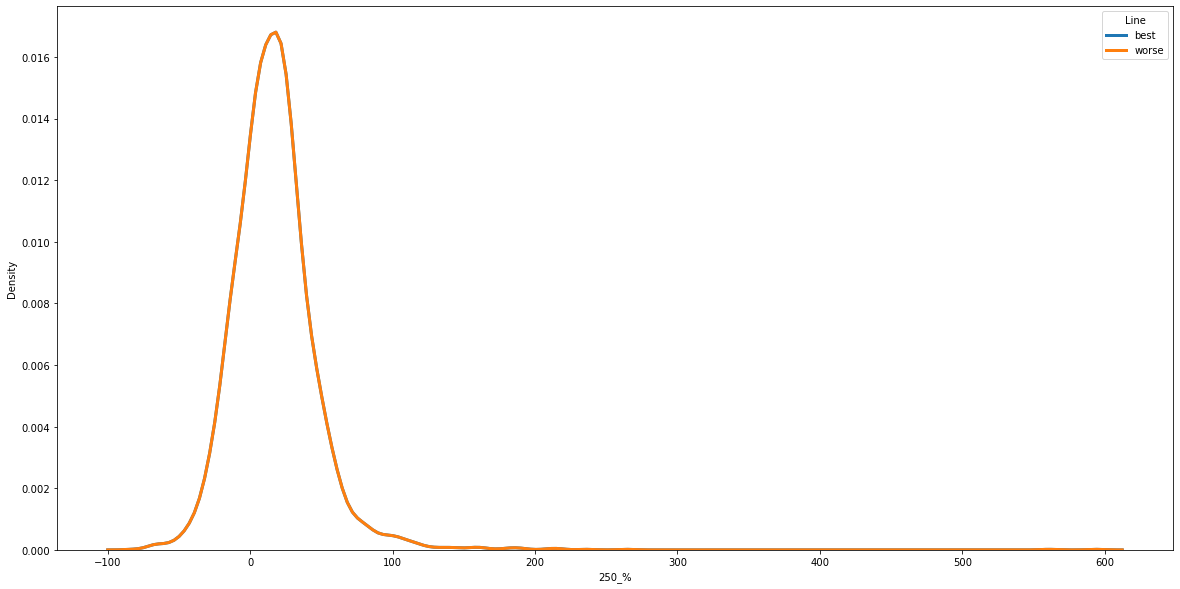

In [ ]:
plt.figure(figsize = (20, 10))
# plt.xlim(-100,100)
sns.distplot(b, hist = False, kde = True, 
                 kde_kws = {'linewidth': 3},
                 label = 'best'
            )
sns.distplot(w, hist = False, kde = True, 
                 kde_kws = {'linewidth': 3},
                 label = 'worse'
            )
plt.legend(prop={'size': 10}, title = 'Line')



In [ ]:
# import matplotlib.pyplot as plt
# plt.figure(figsize = (20, 10))
# plt.plot(plot_df['fear'])

# Мой парсер работает слабо

In [ ]:
%%time
# index = 0
# year = data[index]

text_object_dic[CIK] = {}  # тут нельяз перезаписывать
display(CIK)
# for index in range(len(htm_list[CIK][0])):
for index in [0]:   
    display(htm_list[CIK][1][index])
 ##   directory_7item[param_dict['CIK']][data[index]] = {}
    # grab the response
    response = requests.get(htm_list[CIK][0][index].replace('ix?doc=', ''))
    # pass it through the parser, in this case let's just use lxml because the tags seem to follow xml.
    soup = BeautifulSoup(response.content, 'lxml')
    
    page_text = soup.html.body.get_text(' ',strip = True)
    # normalize the text, remove messy characters. Additionally, restore missing window characters.
    page_text_norm = restore_windows_1252_characters(unicodedata.normalize('NFKD', page_text)) 
    # Additional cleaning steps, removing double spaces, and new line breaks.
    page_text_norm = page_text_norm.replace('  ', ' ').replace('\n',' ').replace('''''', '').replace('"', '').replace("'", '').replace("’", '')
    
    #СОЗДАЕМ ТЕКСТ 7
    str1 = page_text_norm[:].lower().rfind('Item 7. managements discussion and analysis of financial condition and results of operation')
    # str1 
    str2 = page_text_norm[:].lower().rfind('item 8. financial statements and supplementary data')
    # str2 
    text_7 = page_text_norm[str1:str2]
    
    if len(text_7) != 0:
#         
        display(len(text_7))
        #Считаем словечки
        text_object = NRCLex(text_7).affect_frequencies
        #Записали в словарь
        
        year = htm_list[CIK][1][index]
        text_object_dic[CIK][year] = {}
#         text_object_dic[CIK][year]['affect_frequencies'] = {}
        text_object_dic[CIK][year]['affect_frequencies'] = NRCLex(text_7).affect_frequencies
        text_object_dic[CIK][year]['text_7'] = text_7
    else:
        display('no data')
        continue
    
    display("количество слов в документе: {}".format(len(text_object_dic[CIK][year]['text_7'])))
display(text_object_dic[CIK].keys())


'0001018724'

'2020-01-31'

'no data'

dict_keys([])

Wall time: 1.53 s
